# Data Splitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Documents\Projects\Machine Learning\Datathon\LAPTOP MODEL\DATASETFINAL.csv")

df.head()

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nadhi\AppData\Local\Temp\ipykernel_32524\3407294896.py:6: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Documents\Projects\Machine Learning\Datathon\LAPTOP MODEL\DATASETFINAL.csv")


,no,Brand,CPU,GPU,RAM Type,RAM Size,Storage,Screen Type,Refresh Rate,Uniqueness,Upgradeable,price,points,worth
0,1,ACER,8531,NaN,DDR5,8,512,IPS,60,0,1,5054831,9990,well-priced
1,2,ASUS,8657,NaN,DDR5,16,256,IPS,60,0,1,5099000,10013,well-priced
2,3,HP,8657,NaN,DDR4,16,512,IPS,60,0,1,5139000,9673,well-priced
3,4,LENOVO,8657,NaN,DDR5,8,256,IPS,60,0,0,5199000,7589,well-priced
4,5,ACER,5491,NaN,DDR4,8,512,IPS,60,0,1,5229000,7268,well-priced


In [2]:
X = pd.get_dummies(df.drop(["points", "worth"], axis=1))
y = df["worth"]

X = X.fillna(0)



In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(),DecisionTreeClassifier())

model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [5]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
labels_name=["excellent","good","overpriced", "slight overprice", "well-priced" ]


# Validation Score

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_train, y_train_pred, labels=labels_name)
sc = accuracy_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred, average='weighted')


print(classification_report(y_train, y_train_pred))

print(f"SC: {sc} \n" )

print(cm)

                  precision    recall  f1-score   support

       excellent       1.00      1.00      1.00         5
            good       1.00      1.00      1.00        23
      overpriced       1.00      1.00      1.00       703
slight overprice       1.00      1.00      1.00        75
     well-priced       1.00      1.00      1.00        94

        accuracy                           1.00       900
       macro avg       1.00      1.00      1.00       900
    weighted avg       1.00      1.00      1.00       900

SC: 1.0 

[[  5   0   0   0   0]
 [  0  23   0   0   0]
 [  0   0 703   0   0]
 [  0   0   0  75   0]
 [  0   0   0   0  94]]


## Data Visualize

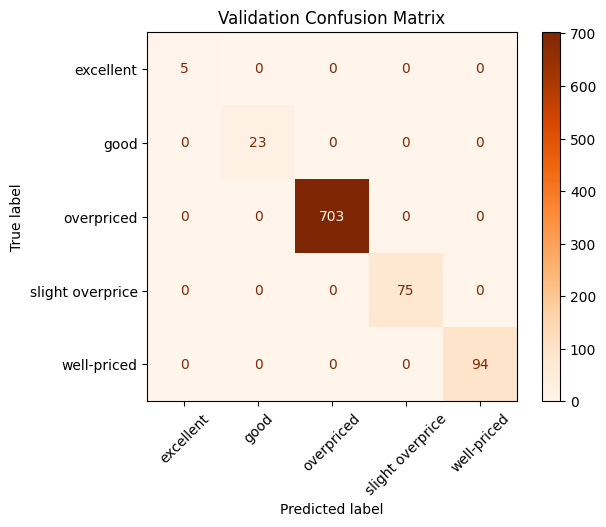

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_name)
disp.plot(cmap='Oranges', xticks_rotation=45)

plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.show()

# Real Test 


In [8]:



cm = confusion_matrix(y_test, y_test_pred, labels=labels_name)
sc = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))





print(f"SC: {sc} \n" )

print(cm)



                  precision    recall  f1-score   support

       excellent       0.00      0.00      0.00         0
            good       0.67      0.50      0.57         4
      overpriced       0.97      0.95      0.96       178
slight overprice       0.62      0.76      0.68        21
     well-priced       0.81      0.74      0.77        23

        accuracy                           0.90       226
       macro avg       0.61      0.59      0.60       226
    weighted avg       0.91      0.90      0.91       226

SC: 0.9026548672566371 

[[  0   0   0   0   0]
 [  0   2   0   0   2]
 [  1   0 169   7   1]
 [  0   0   4  16   1]
 [  0   1   2   3  17]]


d:\Documents\Projects\Machine Learning\Datathon\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Documents\Projects\Machine Learning\Datathon\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Documents\Projects\Machine Learning\Datathon\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

## Data Visualize


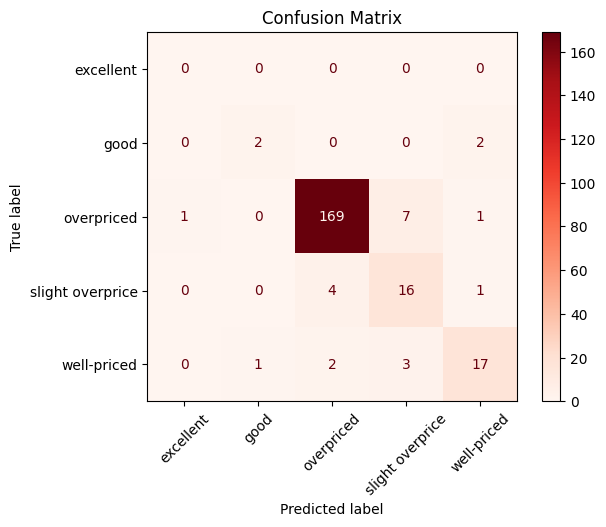

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_name)
disp.plot(cmap='Reds', xticks_rotation=45)

plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [10]:
#import pickle

#with open ('SGDRegression.pkl', 'wb') as files:
    #pickle.dump(model,files)